<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S1_C4_EDA_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA: Exploratory Data Analysis ( Análisis Exploratorio de Datos) Campañas de marketing



* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
* Response (target): 1 if customer accepted the offer in the last campaign, 0 otherwise.
* Complain: 1 if customer complained in the last 2 years.
* DtCustomer: Date of customer’s enrollment with the company.
* Education: Customer’s level of education.
* Marital: Customer’s marital status.
* Kidhome: Number of small children in customer’s household.
* Teenhome: Number of teenagers in customer’s household.
* Income: Customer’s yearly household income.
* MntFishProducts: Amount spent on fish products in the last 2 years.
* MntMeatProducts: Amount spent on meat products in the last 2 years.
* MntFruits: Amount spent on fruit products in the last 2 years.
* MntSweetProducts: Amount spent on sweet products in the last 2 years.
* MntWines: Amount spent on wine products in the last 2 years.
* MntGoldProds: Amount spent on gold products in the last 2 years.
* NumDealsPurchases: Number of purchases made with a discount.
* NumCatalogPurchases: Number of purchases made using a catalog.
* NumStorePurchases: Number of purchases made directly in stores.
* NumWebPurchases: Number of purchases made through the company’s website.
* NumWebVisitsMonth: Number of visits to the company’s website in the last month.
* Recency: Number of days since the last purchase.


In [2]:
import pandas as pd #manejo de datos
import numpy as np #manejo de operaciones entre datos y columnas
import matplotlib.pyplot as plt #para el manejo de graficas
import seaborn as sns #para el manejo de graficas "pero mas bonito"

In [8]:
df = pd.read_excel('/content/marketing_campaign.xlsx')
# para .cvs pd.read_csv('/content/marketing_campaign.xlsx')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
#describe me entrega un resumen solo de los atributos numericos
# count= numero de registros
# mean= promedio
# std= desviación
# min= dato minimo
# max= dato maximo
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
# Que tamaño tiene el data set
df.shape

(2240, 29)

In [15]:
# Que tipo de etiquetas de educación
print(df['Education'].unique())

## Observa: que hay 5 categorias en educación
## Un atributo categorico tiene clases finitas, siempre sera del tipo object

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [16]:
# Que categorias de estado civil tenemos
print(df['Marital_Status'].unique())

## Observa: para esta civil hay 8 categorías
## YOLO: You Onli Live Once

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [22]:
# Que edad tienen los clientes

# tendo el atributo año de nacimiento: Year_Birth
# Debo crear un nuevo atributo calculado
from datetime import date
current_year = date.today().year
print(current_year)
df['Age'] = current_year - df['Year_Birth']


2024


In [23]:
#shape entrega numero de registros y atributos
df.shape

(2240, 30)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<Axes: >

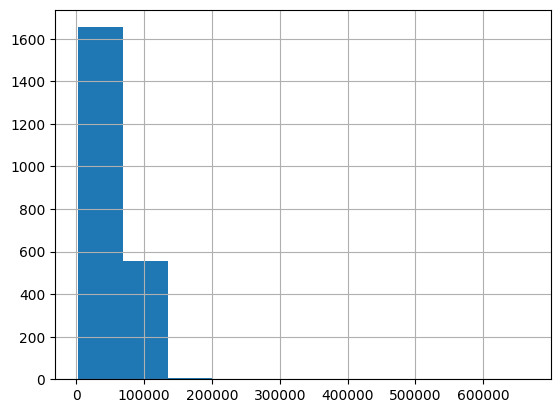

In [26]:
df['Income'].hist()

<Axes: title={'center': 'Income'}, xlabel='Education'>

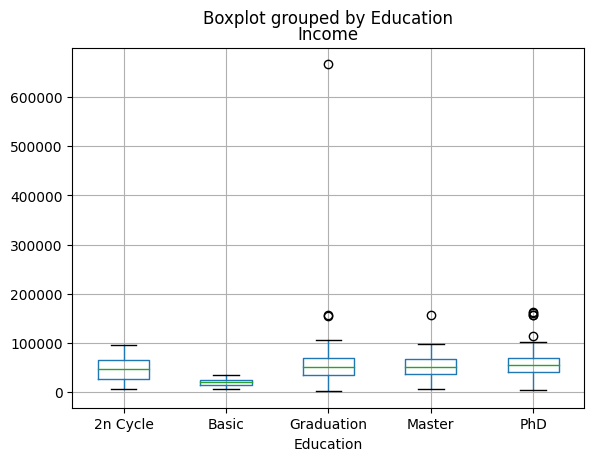

In [31]:
df.boxplot(column="Income", by="Education")


# Observación
* En los clientes el máximo ingreso son de 10000 USD anuales, menos para quienes tienen educacion básica
*


<Axes: title={'center': 'Kidhome'}, xlabel='Education'>

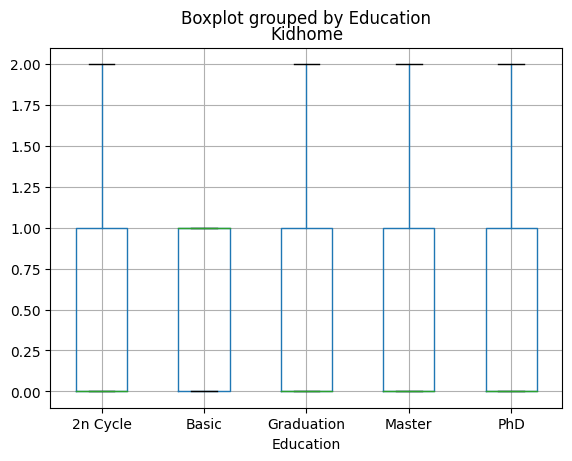

In [33]:
df.boxplot(column="Kidhome", by="Education")


<Axes: title={'center': 'Income'}, xlabel='Marital_Status'>

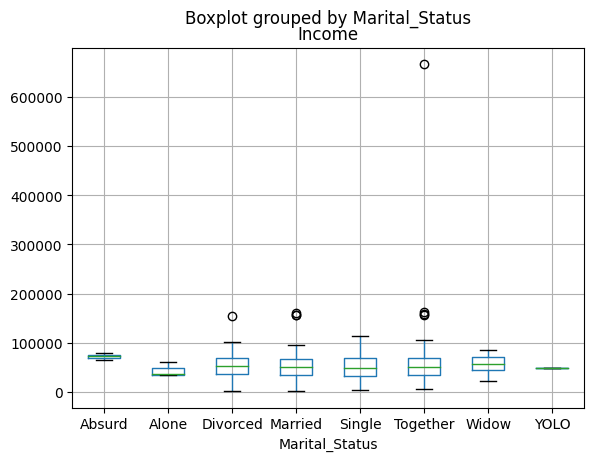

In [35]:
# Correct the column name to "Marital_Status"
df.boxplot(column="Income", by="Marital_Status")

<Axes: title={'center': 'Income'}, xlabel='Age'>

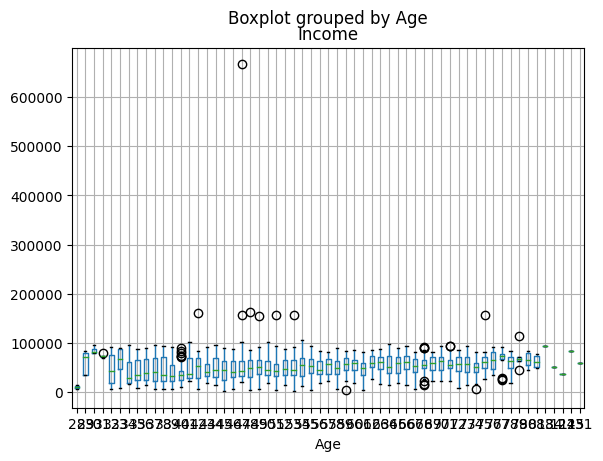

In [36]:
df.boxplot(column="Income", by="Age")

In [37]:
# lambda me da condiciones - cun atributo condicionalpara crear otro -registro-
## para sacar otras categorias
### youth
### middle aged
### old
df['Age_Group'] = df['Age'].apply(lambda x: 'Children' if x <= 16
                                  else ('Youth' if 17 <= x <= 30
                                  else ('Middle Aged' if 30 < x <=  45
                                  else 'Old'
    )
))

In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<Axes: title={'center': 'Kidhome'}, xlabel='Age_Group'>

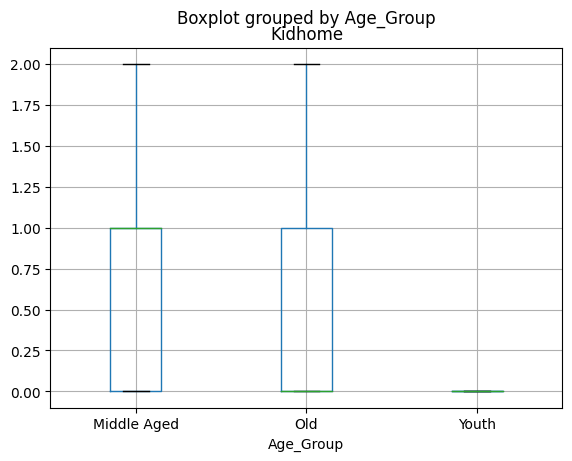

In [39]:
#el codigo column debe tener datos numericos para generar graficas
df.boxplot(column="Kidhome", by="Age_Group")


cantidad de compras de cada **cliente** en los ultimos dos años

In [54]:
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [52]:
df[['MntTotal','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]


,MntTotal,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1617,635,88,546,172,88,88
1,27,11,1,6,2,1,6
2,776,426,49,127,111,21,42
3,53,11,4,20,10,3,5
4,422,173,43,118,46,27,15
...,...,...,...,...,...,...,...
2235,1341,709,43,182,42,118,247
2236,444,406,0,30,0,0,8
2237,1241,908,48,217,32,12,24
2238,843,428,30,214,80,30,61


<Axes: title={'center': 'MntTotal'}, xlabel='Age_Group'>

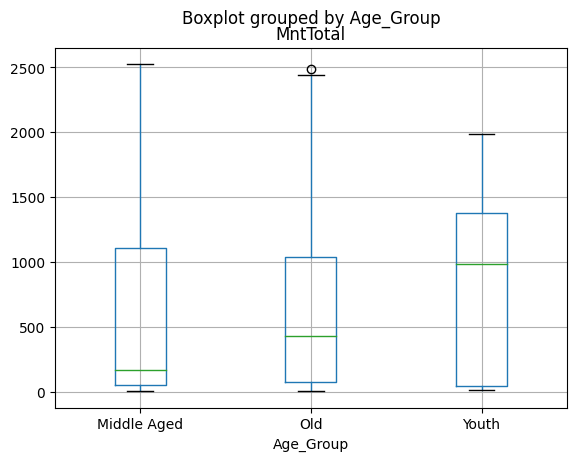

In [53]:
df.boxplot(column="MntTotal", by="Age_Group")
